# Worksheet 3

# Implementation of MCP Neuron for AND and OR Function.

# For ”AND” Operations.

In [35]:
def MCP_Neurons_AND(X1, X2, T):
  """
  This functions implements basic AND operations with MCP Neuron for two inputs.
  Arguments:
  Inputs:
  X1 (1 nd array): An array of binary values.
  X2 (1 nd array): An array of binary values.
  Output:
  state_neuron(1D-list): An state of neuron 1 0r 0 for the particular inputs.
  """
  assert len(X1) == len(X2)
  ### YOUR CODE HERE ###
  # Perform an element wise addition of two input arrays stored in a new array(list):
  # Create a new array to put all the prediction let's name that a state_neuron.
  # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.
  state_neuron = []

  for x1, x2 in zip(X1, X2):
      # Aggregate inputs (sum of two inputs)
      aggregate = x1 + x2

      # Apply threshold to determine the output
      if aggregate >= T:
          state_neuron.append(1)
      else:
          state_neuron.append(0)
  return state_neuron

In [48]:
# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2  # Threshold value

# Call the MCP_Neurons_AND function
result = MCP_Neurons_AND(X1, X2, T)

# Print the result
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")


Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


# For ”OR” Operations.

In [49]:
def MCP_Neurons_OR(X1, X2, T):
    """
    This function implements basic OR operations with MCP Neuron for two inputs.
    Arguments:
    Inputs:
    X1 (1D array): An array of binary values.
    X2 (1D array): An array of binary values.
    Output:
    state_neuron (1D list): The state of the neuron (1 or 0) for the particular inputs.
    """
    assert len(X1) == len(X2)
    ### YOUR CODE HERE ###
    # Perform an element wise addition of two input arrays stored in a new array(list):
    # Create a new array to put all the prediction let's name that a state_neuron.
    # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.
    state_neuron = []

    for x1, x2 in zip(X1, X2):
        # Aggregate inputs (sum of two inputs)
        aggregate = x1 + x2

        # Apply threshold to determine the output
        if aggregate >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)

    return state_neuron


In [50]:
# Example usage for MCP_Neurons_OR function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 1  # Threshold value for OR gate

# Call the MCP_Neurons_OR function
result_or = MCP_Neurons_OR(X1, X2, T)

# Print the result
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")


Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 1, 1, 1]


# Answer the Following Question:

• Question - 1: List out all the limitations of MCP - Neurons.

MCP Neurons have several limitations: They can only solve linearly separable problems (e.g. AND, OR) but fail with non-linear functions like XOR. They lack learning capabilities as weights and thresholds are manually set. Inputs and outputs are strictly binary making them unsuitable for continuous data. They don’t support weighted inputs or activation functions relying solely on thresholding. So, they are single-layer models limiting their computational power and adaptability.

• Question - 2: Think if you can develop a logic to solve for XOR function using MCP Neuron.
{Can you devise a if else rules.}

An MCP Neuron cannot solve XOR alone due to its inability to handle non-linear functions. However XOR can be implemented using a combination of neurons performing simple operations: OR, AND, and NAND (NOT AND). The XOR function is computed as:

XOR
=
(
X1 OR X2
)
 AND NOT
(
X1 AND X2
)
XOR=(X1 OR X2) AND NOT(X1 AND X2)
This approach shows that XOR can be solved by combining multiple MCP Neurons with specific rules.

# Implementation for 0 Vs. 1 Classification.

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Step 1: Load the Dataset

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
df_0_1 = pd.read_csv("/content/drive/MyDrive/AI ML Workshops and tutorials/week 3/mnist_0_and_1.csv")  # Add the correct file path if necessary

# Extract features and labels
X = df_0_1.drop(columns=["label"]).values  # 784 pixels
y = df_0_1["label"].values  # Labels (0 or 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)


Feature matrix shape: (12665, 784)
Label vector shape: (12665,)


Answer the Following Question:
1. Question - 1: What does the shape of X represent?

The shape of X is (12665, 784), which means it is a feature matrix with 12,665 samples (rows) and 784 features (columns). Each sample represents a flattened 28x28 grayscale image of a handwritten digit (0 or 1) where each pixel value is stored as a single element in the row.


2. Question - 2: What does the shape of X represent?

The shape of X represents a dataset where each row corresponds to a single image converted into a 784-dimensional vector (flattened from 28x28 pixels). This matrix is used as input for machine learning models to classify digits 0 and 1.

### Viewing the Dataset.

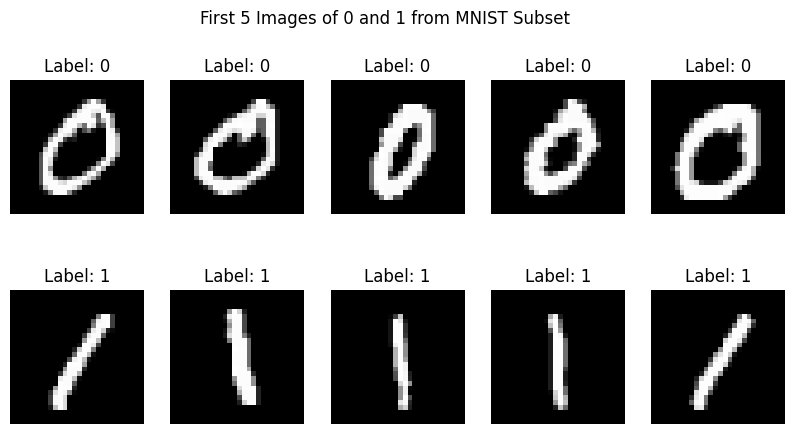

In [53]:
# Separate images for label 0 and label 1
images_0 = X[y == 0]  # Get all images with label 0
images_1 = X[y == 1]  # Get all images with label 1

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
    plt.show()

## Step - 2 - Initializing the Weights:

In [54]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

Answer the Following Question:

1. Question - 3: What does the weights array represent in this context?

The weights array represents the model parameters for the features (pixels) in the dataset. Since each image is represented by 784 pixels the weights array has 784 elements where each element corresponds to the weight associated with one pixel. These weights will determine the influence of each pixel on the model's output during the prediction and training process.

2. Question - 4: Why are we initializing the weights to zero? What effect could this
have on the training process?

We initialize the weights to zero to start with neutral values, ensuring no pixel has a stronger initial influence on the output. While this approach is simple it can cause symmetry issues during training where all weights update similarly slowing down learning.


## Step - 3 - Make a Decision function:

In [55]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(X, weights) + bias
    #####Your Code Here############  # Activation function (step function)
    y_pred_all = np.where(predictions >= 0, 1, 0)

    return y_pred_all

## Step - 3 - Implement the Perceptron Learning Algorithm

In [56]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct prediction.
    """
    # Step 3: Perceptron Learning Algorithm
    # Your Code here#
    for epoch in range(epochs):
        correct_predictions = 0

        for i in range(len(X)):
            prediction = decision_function(X[i:i+1], weights, bias)
            if prediction != y[i]:
                weights += learning_rate * (y[i] - prediction) * X[i]
                bias += learning_rate * (y[i] - prediction)
            else:
                correct_predictions += 1
        accuracy = (correct_predictions / len(X)) * 100
        print(f"Epoch {epoch+1}/{epochs}, Accuracy: {accuracy:.2f}%")

    return weights, bias, accuracy

Answer the Following Question:
1. Question - 5: What is the purpose of the output = np.dot(X[i], weights) + bias line?

The line output = np.dot(X[i], weights) + bias computes the weighted sum of the inputs (X[i]) and adds the bias term. This value represents the linear combination of the inputs and model parameters (weights and bias). This is the input to the activation function (such as the step function) that decides the final prediction of the perceptron.

2. Question - 6: What happens when the prediction is wrong? How are the weights and
bias updated?

When the prediction is incorrect the weights and bias are adjusted to reduce the error.

3. Question - 7:Why is the final accuracy important, and what do you expect it to be?

The final accuracy is crucial as it indicates how well the perceptron has learned to classify the data. It reflects the model's effectiveness and should ideally improve during training.For linearly separable data accuracy may reach 100% while more complex data may result in lower accuracy.

## Training the Perceptron

In [57]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

Epoch 1/100, Accuracy: 99.67%
Epoch 2/100, Accuracy: 99.82%
Epoch 3/100, Accuracy: 99.87%
Epoch 4/100, Accuracy: 99.87%
Epoch 5/100, Accuracy: 99.90%
Epoch 6/100, Accuracy: 99.93%
Epoch 7/100, Accuracy: 99.98%
Epoch 8/100, Accuracy: 99.95%
Epoch 9/100, Accuracy: 99.89%
Epoch 10/100, Accuracy: 99.92%
Epoch 11/100, Accuracy: 99.95%
Epoch 12/100, Accuracy: 99.98%
Epoch 13/100, Accuracy: 100.00%
Epoch 14/100, Accuracy: 100.00%
Epoch 15/100, Accuracy: 100.00%
Epoch 16/100, Accuracy: 100.00%
Epoch 17/100, Accuracy: 100.00%
Epoch 18/100, Accuracy: 100.00%
Epoch 19/100, Accuracy: 100.00%
Epoch 20/100, Accuracy: 100.00%
Epoch 21/100, Accuracy: 100.00%
Epoch 22/100, Accuracy: 100.00%
Epoch 23/100, Accuracy: 100.00%
Epoch 24/100, Accuracy: 100.00%
Epoch 25/100, Accuracy: 100.00%
Epoch 26/100, Accuracy: 100.00%
Epoch 27/100, Accuracy: 100.00%
Epoch 28/100, Accuracy: 100.00%
Epoch 29/100, Accuracy: 100.00%
Epoch 30/100, Accuracy: 100.00%
Epoch 31/100, Accuracy: 100.00%
Epoch 32/100, Accuracy: 100.0

## Step 5: Visualize Misclassified Images

In [58]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")

Final Accuracy: 1.0000
All images were correctly classified!


Answer the Following Question:
1. Question - 8:What does misclassified idx store, and how is it used in this code?

misclassified_idx stores the indices of the data points where the predicted labels (y_pred) do not match the true labels (y). It is used to identify the images that the model misclassified. These indices are then used to visualize the misclassified images by selecting and displaying the corresponding images from the dataset.

2. Question - 9: How do you interpret the result if the output is ”All images were
correctly classified!”?

If the output is "All images were correctly classified!" it means that the perceptron model successfully predicted the correct labels for all input images in the dataset which means the model achieved perfect accuracy with no misclassifications. This suggests that the model has learned to make accurate predictions on the given data.

# Perceptron Algorithm for 3 vs 5 Classification.

1. Implement each Step as we implemented above.


# Step 1: Load the Dataset

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (Ensure the correct file path)
df_3_5 = pd.read_csv("/content/drive/MyDrive/AI ML Workshops and tutorials/week 3/mnist_3_and_5.csv")

# Extract features and labels
X = df_3_5.drop(columns=["label"]).values  # 784 pixels (Flattened images)
y = df_3_5["label"].values  # Labels (3 or 5)

# Convert labels to binary (3 -> 0, 5 -> 1)
y = np.where(y == 3, 0, 1)

print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)



Feature matrix shape: (2741, 784)
Label vector shape: (2741,)


# Viewing the Dataset

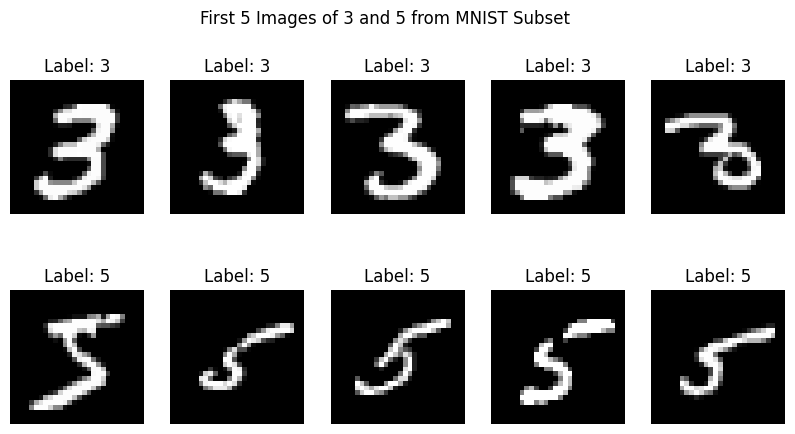

In [60]:
# Separate images for label 3 and label 5
images_3 = X[y == 0]  # All images with label 3
images_5 = X[y == 1]  # All images with label 5

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i in range(5):
    axes[0, i].imshow(images_3[i].reshape(28, 28), cmap="gray")
    axes[0, i].set_title("Label: 3")
    axes[0, i].axis("off")

    axes[1, i].imshow(images_5[i].reshape(28, 28), cmap="gray")
    axes[1, i].set_title("Label: 5")
    axes[1, i].axis("off")

plt.suptitle("First 5 Images of 3 and 5 from MNIST Subset")
plt.show()


# Initialize Weights and Bias:

In [61]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

# Implement a Decision Function or Activation Function:

In [62]:
def decision_function(X, weights, bias):
    predictions = np.dot(X, weights) + bias
    return np.where(predictions >= 0, 1, 0)

# Implement the Perceptron Learning Algorithm:

In [63]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    for epoch in range(epochs):
        correct_predictions = 0

        for i in range(len(X)):
            prediction = decision_function(X[i:i+1], weights, bias)
            if prediction != y[i]:  # Update weights and bias if incorrect
                weights += learning_rate * (y[i] - prediction) * X[i]
                bias += learning_rate * (y[i] - prediction)
            else:
                correct_predictions += 1

        accuracy = (correct_predictions / len(X)) * 100
        print(f"Epoch {epoch+1}/{epochs}, Accuracy: {accuracy:.2f}%")

    return weights, bias, accuracy

# Training the Perceptron Algorithm:

In [64]:
weights, bias, accuracy = train_perceptron(X, y, weights, bias)
print("Final Accuracy:", accuracy)


Epoch 1/100, Accuracy: 91.57%
Epoch 2/100, Accuracy: 93.72%
Epoch 3/100, Accuracy: 94.16%
Epoch 4/100, Accuracy: 94.75%
Epoch 5/100, Accuracy: 94.89%
Epoch 6/100, Accuracy: 95.04%
Epoch 7/100, Accuracy: 95.99%
Epoch 8/100, Accuracy: 95.59%
Epoch 9/100, Accuracy: 95.40%
Epoch 10/100, Accuracy: 95.66%
Epoch 11/100, Accuracy: 95.99%
Epoch 12/100, Accuracy: 95.80%
Epoch 13/100, Accuracy: 96.57%
Epoch 14/100, Accuracy: 96.02%
Epoch 15/100, Accuracy: 96.35%
Epoch 16/100, Accuracy: 96.57%
Epoch 17/100, Accuracy: 96.06%
Epoch 18/100, Accuracy: 96.24%
Epoch 19/100, Accuracy: 96.10%
Epoch 20/100, Accuracy: 96.61%
Epoch 21/100, Accuracy: 97.01%
Epoch 22/100, Accuracy: 96.90%
Epoch 23/100, Accuracy: 97.30%
Epoch 24/100, Accuracy: 96.83%
Epoch 25/100, Accuracy: 96.50%
Epoch 26/100, Accuracy: 97.15%
Epoch 27/100, Accuracy: 97.34%
Epoch 28/100, Accuracy: 96.94%
Epoch 29/100, Accuracy: 97.15%
Epoch 30/100, Accuracy: 97.26%
Epoch 31/100, Accuracy: 96.68%
Epoch 32/100, Accuracy: 97.15%
Epoch 33/100, Acc

2. Visualize the final misclassified images and Provide your conclusion.

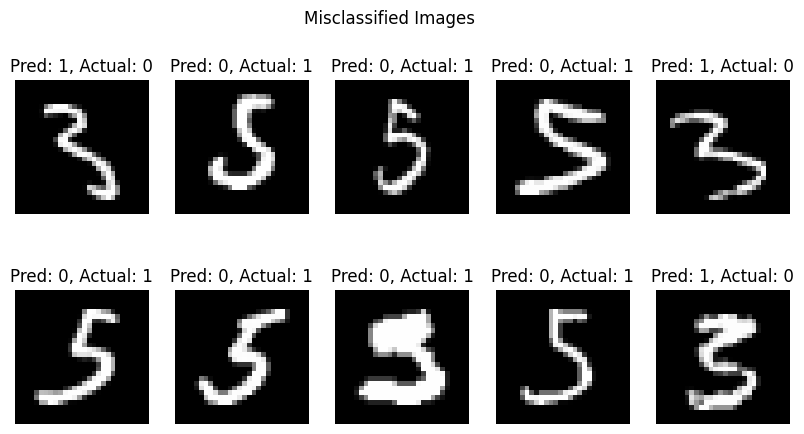

In [65]:
# Get predictions
y_pred = decision_function(X, weights, bias)

# Find misclassified indices
misclassified_indices = np.where(y_pred != y)[0]

# Plot first 10 misclassified images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, idx in enumerate(misclassified_indices[:10]):
    axes[i // 5, i % 5].imshow(X[idx].reshape(28, 28), cmap="gray")
    axes[i // 5, i % 5].set_title(f"Pred: {y_pred[idx]}, Actual: {y[idx]}")
    axes[i // 5, i % 5].axis("off")

plt.suptitle("Misclassified Images")
plt.show()

